In [1]:
import pandas as pd
import numpy as np

In [2]:
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
# pd.set_option('display.expand_frame_repr', True)

In [3]:
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import datetime
import warnings
warnings.filterwarnings('ignore')

In [4]:
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 4)
rcParams['figure.dpi'] = 150
#rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 8
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

In [5]:
df=pd.read_csv('data_perovskites.csv')

In [6]:
new_data=pd.read_csv('rhombohedral.csv')

In [7]:
en_bl=pd.read_csv('Electronegativity and bond lengths.csv')

In [8]:
wp1=df.drop(['Formation energy [eV/atom]','Stability [eV/atom]','Magnetic moment [mu_B]','Volume per atom [A^3/atom]','a [ang]','b [ang]','c [ang]','alpha [deg]','beta [deg]','gamma [deg]','Vacancy energy [eV/O atom]','Band gap [eV]'],axis=1)

In [9]:
wp1=wp1[wp1['Lowest distortion']!='-']

In [10]:
wp1['Goldschmidt Tolerance']=(wp1['Radius A [ang]']+1.4)/((2**.5)*(wp1['Radius B [ang]']+1.4))

In [11]:
wp1['Octahedral factor']=(wp1['Radius B [ang]']/1.4)

In [12]:
wp1=wp1[wp1['In literature']==True]

In [13]:
wp1['Goldschmidt Tolerance'].describe()

count    222.000000
mean       0.917435
std        0.058414
min        0.803672
25%        0.869353
50%        0.913624
75%        0.959085
max        1.058901
Name: Goldschmidt Tolerance, dtype: float64

In [15]:
wp1['Octahedral factor'].describe()

count    222.000000
mean       0.471557
std        0.069575
min        0.378571
25%        0.428571
50%        0.457143
75%        0.492857
max        0.671429
Name: Octahedral factor, dtype: float64

In [306]:
wp1=wp1[wp1['Valence A']!='not balanced']

In [307]:
wp1=wp1[wp1['Valence A']!='element not in BV']

In [308]:
wp1

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Goldschmidt Tolerance,Octahedral factor
109,AgNbO3,Ag,Nb,True,1,5,1.28,0.64,rhombohedral,0.928944,0.457143
125,AgSbO3,Ag,Sb,True,1,5,1.28,0.60,orthorhombic,0.947523,0.428571
131,AgTaO3,Ag,Ta,True,1,5,1.28,0.64,rhombohedral,0.928944,0.457143
140,AgVO3,Ag,V,True,1,5,1.28,0.54,tetragonal,0.976828,0.385714
449,BaCeO3,Ba,Ce,True,2,4,1.61,0.87,orthorhombic,0.937617,0.621429
...,...,...,...,...,...,...,...,...,...,...,...
5129,YbFeO3,Yb,Fe,True,3,3,1.04,0.65,orthorhombic,0.841630,0.464286
5143,YbMnO3,Yb,Mn,True,2,4,1.14,0.53,orthorhombic,0.930596,0.378571
5148,YbNiO3,Yb,Ni,True,3,3,1.04,0.60,orthorhombic,0.862670,0.428571
5173,YbTiO3,Yb,Ti,True,2,4,1.14,0.61,orthorhombic,0.893558,0.435714


In [309]:
wp1['Valence A']=pd.to_numeric(wp1['Valence A'],downcast='float')
wp1['Valence B']=pd.to_numeric(wp1['Valence B'],downcast='float')

In [310]:
wp1

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Goldschmidt Tolerance,Octahedral factor
109,AgNbO3,Ag,Nb,True,1.0,5.0,1.28,0.64,rhombohedral,0.928944,0.457143
125,AgSbO3,Ag,Sb,True,1.0,5.0,1.28,0.60,orthorhombic,0.947523,0.428571
131,AgTaO3,Ag,Ta,True,1.0,5.0,1.28,0.64,rhombohedral,0.928944,0.457143
140,AgVO3,Ag,V,True,1.0,5.0,1.28,0.54,tetragonal,0.976828,0.385714
449,BaCeO3,Ba,Ce,True,2.0,4.0,1.61,0.87,orthorhombic,0.937617,0.621429
...,...,...,...,...,...,...,...,...,...,...,...
5129,YbFeO3,Yb,Fe,True,3.0,3.0,1.04,0.65,orthorhombic,0.841630,0.464286
5143,YbMnO3,Yb,Mn,True,2.0,4.0,1.14,0.53,orthorhombic,0.930596,0.378571
5148,YbNiO3,Yb,Ni,True,3.0,3.0,1.04,0.60,orthorhombic,0.862670,0.428571
5173,YbTiO3,Yb,Ti,True,2.0,4.0,1.14,0.61,orthorhombic,0.893558,0.435714


In [311]:
new_data=new_data[['ABO3','rA at 12 [ang]','rA at 6 [ang]','rB at 6 [ang]','VA/VB','tR']]

In [312]:
wp11=pd.merge(wp1,new_data,how='left',left_on='Chemical formula',right_on='ABO3')

In [313]:
wp11=pd.merge(wp11,en_bl,how='left',left_on='Chemical formula',right_on='ABO3')

In [314]:
wp11

,Chemical formula,A_x,B_x,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Goldschmidt Tolerance,Octahedral factor,ABO3_x,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,ABO3_y,A_y,B_y,EN of A,EN of B,Bond length of A,Bond length of B
0,AgNbO3,Ag,Nb,True,1.0,5.0,1.28,0.64,rhombohedral,0.928944,0.457143,AgNbO3,1.28,0.95,0.64,4.008103,0.914881,AgNbO3,Ag,Nb,1.93,1.60,2.761453,1.955055
1,AgSbO3,Ag,Sb,True,1.0,5.0,1.28,0.60,orthorhombic,0.947523,0.428571,AgSbO3,1.28,0.95,0.60,4.253431,0.916382,AgSbO3,Ag,Sb,1.93,2.05,2.761453,2.075849
2,AgTaO3,Ag,Ta,True,1.0,5.0,1.28,0.64,rhombohedral,0.928944,0.457143,AgTaO3,1.28,0.95,0.64,4.008103,0.914881,AgTaO3,Ag,Ta,1.93,1.50,2.761453,1.956808
3,AgVO3,Ag,V,True,1.0,5.0,1.28,0.54,tetragonal,0.976828,0.385714,AgVO3,1.28,0.95,0.54,4.660411,0.919137,AgVO3,Ag,V,1.93,1.63,2.761453,1.758039
4,BaCeO3,Ba,Ce,True,2.0,4.0,1.61,0.87,orthorhombic,0.937617,0.621429,BaCeO3,1.61,1.35,0.87,4.121420,1.116111,BaCeO3,Ba,Ce,0.89,1.12,2.942999,2.268642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,YbFeO3,Yb,Fe,True,3.0,3.0,1.04,0.65,orthorhombic,0.841630,0.464286,YbFeO3,1.04,0.95,0.65,2.980800,1.053032,YbFeO3,Yb,Fe,1.10,1.83,2.519261,1.999522
206,YbMnO3,Yb,Mn,True,2.0,4.0,1.14,0.53,orthorhombic,0.930596,0.378571,YbMnO3,1.14,0.95,0.53,4.029529,0.992804,YbMnO3,Yb,Mn,1.10,1.55,2.519261,2.169994
207,YbNiO3,Yb,Ni,True,3.0,3.0,1.04,0.60,orthorhombic,0.862670,0.428571,YbNiO3,1.04,0.95,0.60,3.209996,1.054402,YbNiO3,Yb,Ni,1.10,1.91,2.519261,2.103725
208,YbTiO3,Yb,Ti,True,2.0,4.0,1.14,0.61,orthorhombic,0.893558,0.435714,YbTiO3,1.14,0.95,0.61,3.567286,0.989479,YbTiO3,Yb,Ti,1.10,1.54,2.519261,1.927849


In [315]:
wp11['New Tolerance Factor']=((wp11['rA at 6 [ang]']/wp11['rA at 12 [ang]'])/3)*((wp11['Radius A [ang]']+1.4)/(wp11['Radius B [ang]']+1.4))*((wp11['Radius B [ang]']+1.4)/1.4*(2**0.5))*((wp11['Radius A [ang]']+1.4)/1.4*(2**0.5))

In [316]:
wp11[wp11['Valence A']==1].to_csv('A1.csv')
wp11[wp11['Valence A']==2].to_csv('A2.csv')
wp11[wp11['Valence A']==3].to_csv('A3.csv')
wp11[wp11['Valence A']==4].to_csv('A4.csv')
wp11[wp11['Valence A']==5].to_csv('A5.csv')

In [317]:
wp11['Bond length of A'].value_counts()

2.689119    19
2.768351    14
2.645083    14
2.942999    12
2.617634    12
2.648078    12
2.577786    10
2.550861    10
2.566449    10
2.571812    10
2.611965     9
2.546312     9
2.675988     9
2.557065     8
2.519261     7
2.536253     7
2.411516     6
2.500930     5
2.514402     5
2.759925     5
2.761453     4
2.659877     3
2.568546     3
3.025719     3
3.112266     1
2.453212     1
2.417029     1
2.531967     1
Name: Bond length of A, dtype: int64

In [318]:
wp11['Lowest distortion'].value_counts()/210

orthorhombic    0.833333
cubic           0.076190
rhombohedral    0.061905
tetragonal      0.028571
Name: Lowest distortion, dtype: float64

In [319]:
supposed_rhom = wp11[(wp11['tR'] >= 0.9) & (wp11['tR'] <= 1.1)]

In [320]:
supposed_rhom['Lowest distortion'].value_counts()/161

orthorhombic    0.875776
rhombohedral    0.055901
cubic           0.049689
tetragonal      0.018634
Name: Lowest distortion, dtype: float64

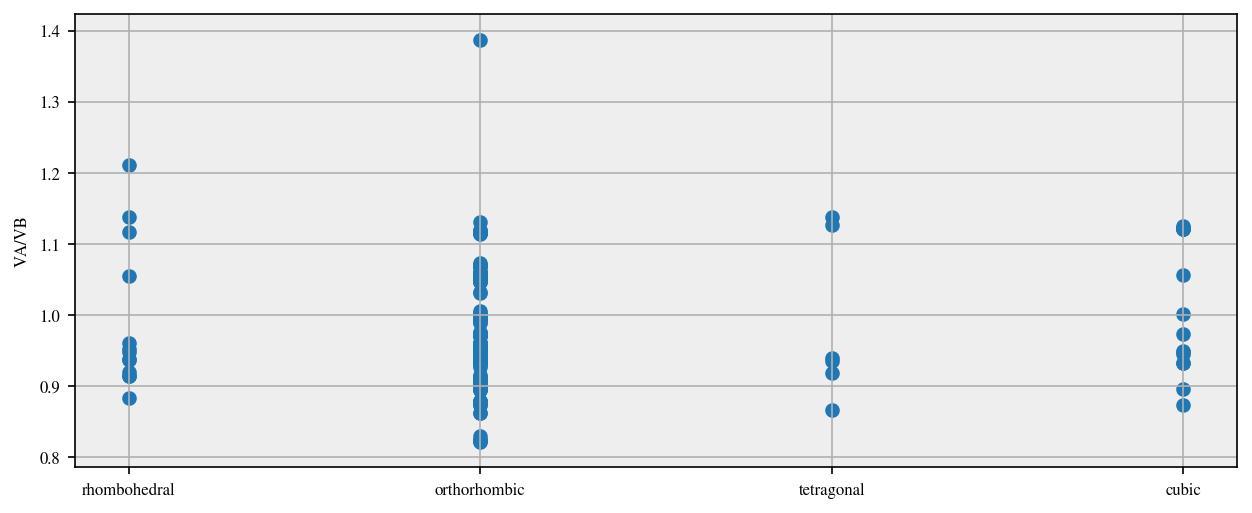

In [321]:
plt.scatter(wp11['Lowest distortion'], wp11['tR'])
#plt.tight_layout()
plt.ylabel('VA/VB')
plt.show()

### Watch out for this step

In [322]:
#wp11=wp11[wp11['In literature']==True]

In [323]:
wp11

,Chemical formula,A_x,B_x,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Goldschmidt Tolerance,Octahedral factor,ABO3_x,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,ABO3_y,A_y,B_y,EN of A,EN of B,Bond length of A,Bond length of B,New Tolerance Factor
0,AgNbO3,Ag,Nb,True,1.0,5.0,1.28,0.64,rhombohedral,0.928944,0.457143,AgNbO3,1.28,0.95,0.64,4.008103,0.914881,AgNbO3,Ag,Nb,1.93,1.60,2.761453,1.955055,1.813159
1,AgSbO3,Ag,Sb,True,1.0,5.0,1.28,0.60,orthorhombic,0.947523,0.428571,AgSbO3,1.28,0.95,0.60,4.253431,0.916382,AgSbO3,Ag,Sb,1.93,2.05,2.761453,2.075849,1.813159
2,AgTaO3,Ag,Ta,True,1.0,5.0,1.28,0.64,rhombohedral,0.928944,0.457143,AgTaO3,1.28,0.95,0.64,4.008103,0.914881,AgTaO3,Ag,Ta,1.93,1.50,2.761453,1.956808,1.813159
3,AgVO3,Ag,V,True,1.0,5.0,1.28,0.54,tetragonal,0.976828,0.385714,AgVO3,1.28,0.95,0.54,4.660411,0.919137,AgVO3,Ag,V,1.93,1.63,2.761453,1.758039,1.813159
4,BaCeO3,Ba,Ce,True,2.0,4.0,1.61,0.87,orthorhombic,0.937617,0.621429,BaCeO3,1.61,1.35,0.87,4.121420,1.116111,BaCeO3,Ba,Ce,0.89,1.12,2.942999,2.268642,2.584006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,YbFeO3,Yb,Fe,True,3.0,3.0,1.04,0.65,orthorhombic,0.841630,0.464286,YbFeO3,1.04,0.95,0.65,2.980800,1.053032,YbFeO3,Yb,Fe,1.10,1.83,2.519261,1.999522,1.849791
206,YbMnO3,Yb,Mn,True,2.0,4.0,1.14,0.53,orthorhombic,0.930596,0.378571,YbMnO3,1.14,0.95,0.53,4.029529,0.992804,YbMnO3,Yb,Mn,1.10,1.55,2.519261,2.169994,1.828685
207,YbNiO3,Yb,Ni,True,3.0,3.0,1.04,0.60,orthorhombic,0.862670,0.428571,YbNiO3,1.04,0.95,0.60,3.209996,1.054402,YbNiO3,Yb,Ni,1.10,1.91,2.519261,2.103725,1.849791
208,YbTiO3,Yb,Ti,True,2.0,4.0,1.14,0.61,orthorhombic,0.893558,0.435714,YbTiO3,1.14,0.95,0.61,3.567286,0.989479,YbTiO3,Yb,Ti,1.10,1.54,2.519261,1.927849,1.828685


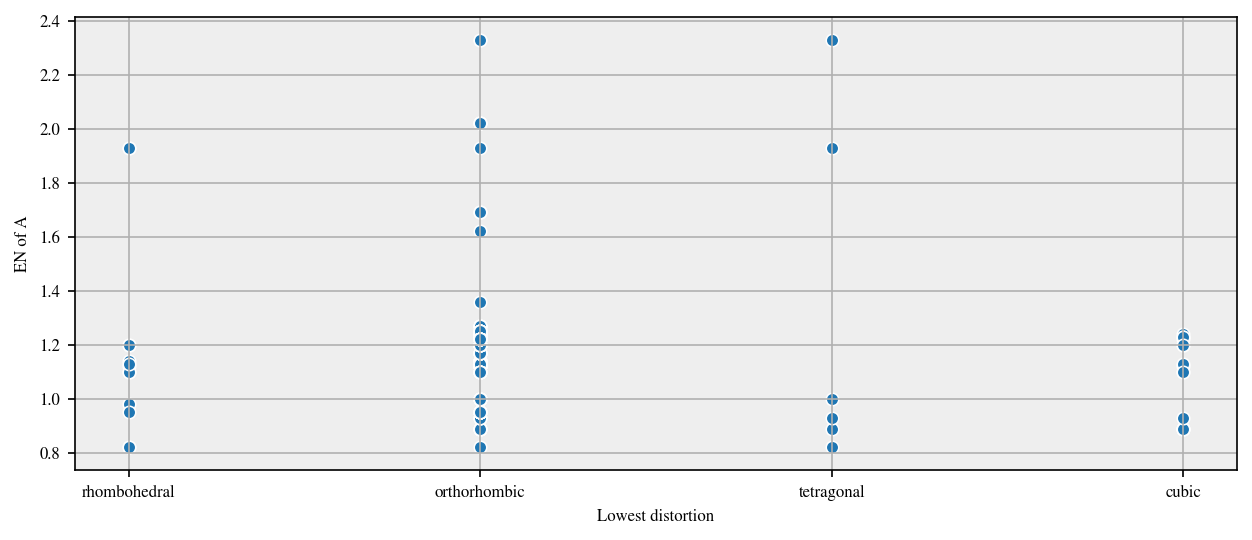

In [329]:
sns.scatterplot(wp11['Lowest distortion'],wp11['EN of A'])

In [325]:
categorical = wp11.select_dtypes(include=[np.object])

numeric = wp11.select_dtypes(include=[np.int,np.float32,np.float])
numeric_cols = numeric.columns

In [326]:
categorical

,Chemical formula,A_x,B_x,Lowest distortion,ABO3_x,ABO3_y,A_y,B_y
0,AgNbO3,Ag,Nb,rhombohedral,AgNbO3,AgNbO3,Ag,Nb
1,AgSbO3,Ag,Sb,orthorhombic,AgSbO3,AgSbO3,Ag,Sb
2,AgTaO3,Ag,Ta,rhombohedral,AgTaO3,AgTaO3,Ag,Ta
3,AgVO3,Ag,V,tetragonal,AgVO3,AgVO3,Ag,V
4,BaCeO3,Ba,Ce,orthorhombic,BaCeO3,BaCeO3,Ba,Ce
...,...,...,...,...,...,...,...,...
205,YbFeO3,Yb,Fe,orthorhombic,YbFeO3,YbFeO3,Yb,Fe
206,YbMnO3,Yb,Mn,orthorhombic,YbMnO3,YbMnO3,Yb,Mn
207,YbNiO3,Yb,Ni,orthorhombic,YbNiO3,YbNiO3,Yb,Ni
208,YbTiO3,Yb,Ti,orthorhombic,YbTiO3,YbTiO3,Yb,Ti


In [204]:
numeric

,Valence A,Valence B,Radius A [ang],Radius B [ang],Goldschmidt Tolerance,Octahedral factor,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,EN of A,EN of B,Bond length of A,Bond length of B,New Tolerance Factor
0,1.0,5.0,1.28,0.64,0.928944,0.457143,1.28,0.95,0.64,4.008103,0.914881,1.93,1.60,2.761453,1.955055,1.813159
1,1.0,5.0,1.28,0.60,0.947523,0.428571,1.28,0.95,0.60,4.253431,0.916382,1.93,2.05,2.761453,2.075849,1.813159
2,1.0,5.0,1.28,0.64,0.928944,0.457143,1.28,0.95,0.64,4.008103,0.914881,1.93,1.50,2.761453,1.956808,1.813159
3,1.0,5.0,1.28,0.54,0.976828,0.385714,1.28,0.95,0.54,4.660411,0.919137,1.93,1.63,2.761453,1.758039,1.813159
4,2.0,4.0,1.61,0.87,0.937617,0.621429,1.61,1.35,0.87,4.121420,1.116111,0.89,1.12,2.942999,2.268642,2.584006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,3.0,3.0,1.04,0.65,0.841630,0.464286,1.04,0.95,0.65,2.980800,1.053032,1.10,1.83,2.519261,1.999522,1.849791
206,2.0,4.0,1.14,0.53,0.930596,0.378571,1.14,0.95,0.53,4.029529,0.992804,1.10,1.55,2.519261,2.169994,1.828685
207,3.0,3.0,1.04,0.60,0.862670,0.428571,1.04,0.95,0.60,3.209996,1.054402,1.10,1.91,2.519261,2.103725,1.849791
208,2.0,4.0,1.14,0.61,0.893558,0.435714,1.14,0.95,0.61,3.567286,0.989479,1.10,1.54,2.519261,1.927849,1.828685


In [205]:
corr = numeric.corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Valence A,Valence B,Radius A [ang],Radius B [ang],Goldschmidt Tolerance,Octahedral factor,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],VA/VB,tR,EN of A,EN of B,Bond length of A,Bond length of B,New Tolerance Factor
Valence A,1.00,-1.00,-0.53,0.01,-0.54,0.01,-0.53,-0.47,0.01,-0.54,-0.16,0.11,-0.01,-0.54,0.07,-0.46
Valence B,-1.00,1.00,0.53,-0.01,0.54,-0.01,0.53,0.47,-0.01,0.54,0.16,-0.11,0.01,0.54,-0.07,0.46
Radius A [ang],-0.53,0.53,1.00,0.34,0.78,0.34,1.00,0.80,0.34,0.78,0.13,-0.21,-0.12,0.84,0.22,0.77
Radius B [ang],0.01,-0.01,0.34,1.00,-0.32,1.00,0.34,0.33,1.00,-0.31,0.10,-0.15,-0.39,0.35,0.58,0.32
Goldschmidt Tolerance,-0.54,0.54,0.78,-0.32,1.00,-0.32,0.78,0.57,-0.32,1.00,0.06,-0.11,0.13,0.61,-0.17,0.55
Octahedral factor,0.01,-0.01,0.34,1.00,-0.32,1.00,0.34,0.33,1.00,-0.31,0.10,-0.15,-0.39,0.35,0.58,0.32
rA at 12 [ang],-0.53,0.53,1.00,0.34,0.78,0.34,1.00,0.80,0.34,0.78,0.13,-0.21,-0.12,0.84,0.22,0.77
rA at 6 [ang],-0.47,0.47,0.80,0.33,0.57,0.33,0.80,1.00,0.33,0.59,0.70,-0.44,-0.09,0.88,0.22,1.00
rB at 6 [ang],0.01,-0.01,0.34,1.00,-0.32,1.00,0.34,0.33,1.00,-0.32,0.10,-0.15,-0.39,0.35,0.58,0.32
VA/VB,-0.54,0.54,0.78,-0.31,1.00,-0.31,0.78,0.59,-0.32,1.00,0.08,-0.12,0.12,0.61,-0.17,0.56


In [206]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [207]:
numeric.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in numeric.columns.values]

In [208]:
test=wp11

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

In [210]:
le_target = LabelEncoder()
test['Lowest distortion']= le_target.fit_transform(test['Lowest distortion'])

In [211]:
numeric

,Valence A,Valence B,Radius A _ang_,Radius B _ang_,Goldschmidt Tolerance,Octahedral factor,rA at 12 _ang_,rA at 6 _ang_,rB at 6 _ang_,VA/VB,tR,EN of A,EN of B,Bond length of A,Bond length of B,New Tolerance Factor
0,1.0,5.0,1.28,0.64,0.928944,0.457143,1.28,0.95,0.64,4.008103,0.914881,1.93,1.60,2.761453,1.955055,1.813159
1,1.0,5.0,1.28,0.60,0.947523,0.428571,1.28,0.95,0.60,4.253431,0.916382,1.93,2.05,2.761453,2.075849,1.813159
2,1.0,5.0,1.28,0.64,0.928944,0.457143,1.28,0.95,0.64,4.008103,0.914881,1.93,1.50,2.761453,1.956808,1.813159
3,1.0,5.0,1.28,0.54,0.976828,0.385714,1.28,0.95,0.54,4.660411,0.919137,1.93,1.63,2.761453,1.758039,1.813159
4,2.0,4.0,1.61,0.87,0.937617,0.621429,1.61,1.35,0.87,4.121420,1.116111,0.89,1.12,2.942999,2.268642,2.584006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,3.0,3.0,1.04,0.65,0.841630,0.464286,1.04,0.95,0.65,2.980800,1.053032,1.10,1.83,2.519261,1.999522,1.849791
206,2.0,4.0,1.14,0.53,0.930596,0.378571,1.14,0.95,0.53,4.029529,0.992804,1.10,1.55,2.519261,2.169994,1.828685
207,3.0,3.0,1.04,0.60,0.862670,0.428571,1.04,0.95,0.60,3.209996,1.054402,1.10,1.91,2.519261,2.103725,1.849791
208,2.0,4.0,1.14,0.61,0.893558,0.435714,1.14,0.95,0.61,3.567286,0.989479,1.10,1.54,2.519261,1.927849,1.828685


In [252]:
X=numeric.drop(['Radius A _ang_','Radius B _ang_','New Tolerance Factor','Valence B','VA/VB'],axis=1)
y=test['Lowest distortion']

In [253]:
test['Lowest distortion'].value_counts()

1    175
0     16
2     13
3      6
Name: Lowest distortion, dtype: int64

In [254]:
categorical['Lowest distortion'].value_counts()

orthorhombic    175
cubic            16
rhombohedral     13
tetragonal        6
Name: Lowest distortion, dtype: int64

In [255]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [256]:
train_data = pd.concat([X_train, y_train], axis=1)

In [257]:
train_data['Lowest distortion'].value_counts()

1    115
0     11
2      9
3      5
Name: Lowest distortion, dtype: int64

In [258]:
cubic = train_data[train_data['Lowest distortion']==0]
orthorhombic = train_data[train_data['Lowest distortion']==1]
rhombohedral = train_data[train_data['Lowest distortion']==2]
tetragonal= train_data[train_data['Lowest distortion']==3]

In [259]:
# upsample minority
rho_upsampled = resample(rhombohedral,
 replace=True, # sample with replacement
 n_samples=len(orthorhombic), # match number in majority class
 random_state=27) # reproducible results

# upsample minority
tetra_upsampled = resample(tetragonal,
 replace=True, # sample with replacement
 n_samples=len(orthorhombic), # match number in majority class
 random_state=27) # reproducible results

# upsample minority
cubic_upsampled = resample(cubic,
 replace=True, # sample with replacement
 n_samples=len(orthorhombic), # match number in majority class
 random_state=27) # reproducible results

In [260]:
upsampled = pd.concat([orthorhombic, rho_upsampled, cubic_upsampled, tetra_upsampled])

In [261]:
upsampled['Lowest distortion'].value_counts()

3    115
2    115
1    115
0    115
Name: Lowest distortion, dtype: int64

In [262]:
X_new=upsampled.drop('Lowest distortion',axis=1)
y_new=upsampled['Lowest distortion']

In [263]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [264]:
classifiers=list()
model1 = XGBClassifier()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)

In [265]:
classifiers

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=3,
               min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
               nthread=None, objective='binary:logistic', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=1, verbosity=1),
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples

## SVM

In [266]:
model2.fit(X_new, y_new)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [267]:
model2.score(X_new,y_new)

0.6282608695652174

In [268]:
model2.score(X_test,y_test)

0.7428571428571429

In [269]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

preds = model2.predict(X_test)
accuracy_score(preds,y_test)

0.7428571428571429

In [270]:
confusion_matrix(preds,y_test)

array([[ 1,  7,  0,  0],
       [ 2, 51,  3,  1],
       [ 0,  1,  0,  0],
       [ 2,  1,  1,  0]], dtype=int64)

In [271]:
y_test.value_counts()

1    60
0     5
2     4
3     1
Name: Lowest distortion, dtype: int64

In [272]:
pd.Series(preds).value_counts()

1    57
0     8
3     4
2     1
dtype: int64

In [273]:
#With valence
#acc=0.5636114911080712
#array([[266,  56,  21,   2],
 #      [125, 132,   9,   3],
  #     [ 45,  19,   8,   2],
   #    [ 27,   6,   4,   6]], dtype=int64)
    
#Without valence
#acc=0.5636114911080712

#array([[682, 118,  33,  11],
#       [144, 237,  28,   6],
#       [164, 114,  42,   0],
#       [ 88,  41,  10,  24]], dtype=int64)

#only real values
#acc=0.6285714285714286
#array([[ 3, 19,  1,  1],
 #      [ 2, 41,  2,  0],
  #     [ 0,  0,  0,  0],
    #   [ 0,  0,  1,  0]], dtype=int64)
    
#using VA/VB
#acc=0.5690834473324213
#array([[279,  56,  11,   2],
#       [ 84, 114,   8,   4],
#       [ 80,  27,  18,   2],
#       [ 20,  16,   5,   5]], dtype=int64)



##Only real values with tR
#acc=0.6428571428571429


##Only real values with new tolerance factor
#acc=0.6714285714285714

#Involving EN and BL values
#acc=0.6285714285714286

#Dropping Valence B and VA/VB
#acc=0.7428571428571429

## XGBoost

In [274]:
model1.fit(X_new, y_new)
model1.score(X_new,y_new)

1.0

In [275]:
model1.score(X_test,y_test)

0.8571428571428571

In [276]:
preds = model1.predict(X_test)
accuracy_score(preds,y_test)

0.8571428571428571

In [277]:
confusion_matrix(preds,y_test)

array([[ 2,  0,  0,  0],
       [ 3, 58,  3,  1],
       [ 0,  2,  0,  0],
       [ 0,  0,  1,  0]], dtype=int64)

In [278]:
X_new['Valence A'].value_counts()

3.0    179
2.0    141
1.0    140
Name: Valence A, dtype: int64

In [279]:
X_new['Valence B'].value_counts()

KeyError: 'Valence B'

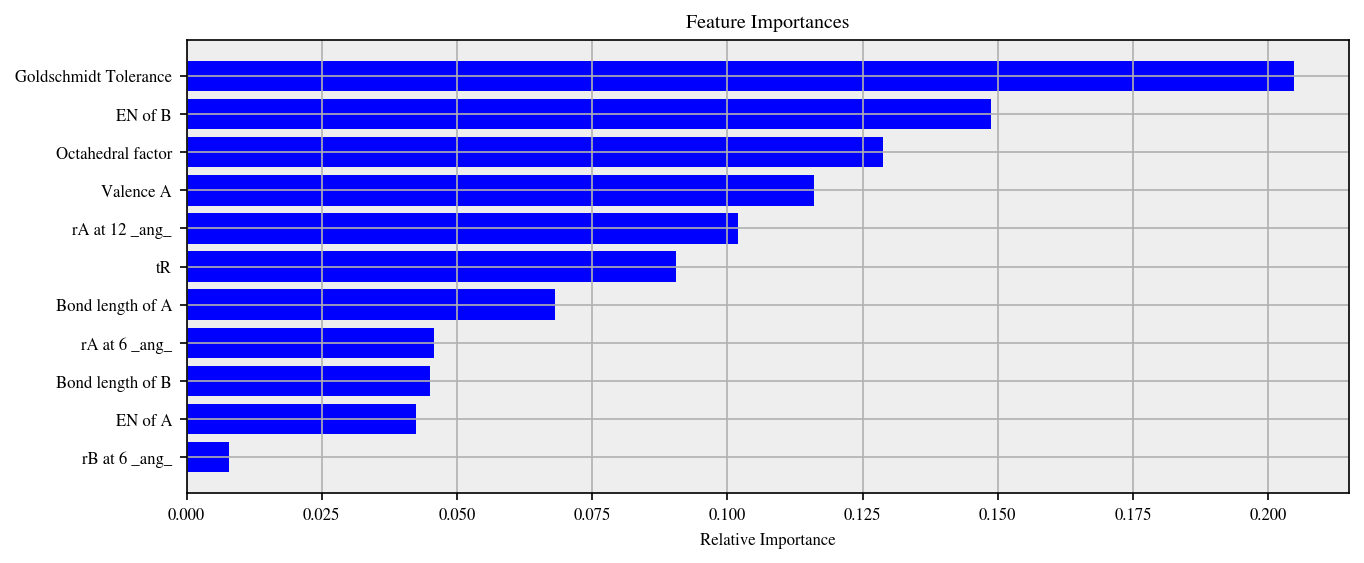

In [280]:
features = X_new.columns
importances = model1.feature_importances_
indices = np.argsort(importances)

#plt.figure(figsize=(6,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [281]:
#acc with only valence A = 0.6607387140902873
#array([[327,  48,   7,   0],
#       [ 74, 121,   8,   0],
#       [ 38,  27,  25,   3],
#       [ 24,  17,   2,  10]], dtype=int64)

#using VA/VB
#0.6566347469220246

#Without taking the valencies 
#acc=0.6061997703788748

#Only real values with tR
#acc=0.8285714285714286

#Only real values with new tolerance factor
#acc=0.7857142857142857

#Involving EN and BL values
#acc=0.8571428571428571

## Decision Tree

In [282]:
model3.fit(X_new, y_new)
model3.score(X_new,y_new)

1.0

In [283]:
model3.score(X_test,y_test)

0.7714285714285715

In [284]:
preds = model3.predict(X_test)
accuracy_score(preds,y_test)

0.7714285714285715

In [285]:
confusion_matrix(preds,y_test)

array([[ 3,  4,  0,  0],
       [ 2, 51,  2,  0],
       [ 0,  4,  0,  1],
       [ 0,  1,  2,  0]], dtype=int64)

In [286]:
pd.Series(preds).value_counts()

1    55
0     7
2     5
3     3
dtype: int64

## Random Forest

In [287]:
model4.fit(X_new, y_new)
model4.score(X_new,y_new)

1.0

In [288]:
model4.score(X_test,y_test)

0.8714285714285714

In [289]:
accuracy_score(preds,y_test)

0.7714285714285715

In [290]:
confusion_matrix(preds,y_test)

array([[ 3,  4,  0,  0],
       [ 2, 51,  2,  0],
       [ 0,  4,  0,  1],
       [ 0,  1,  2,  0]], dtype=int64)

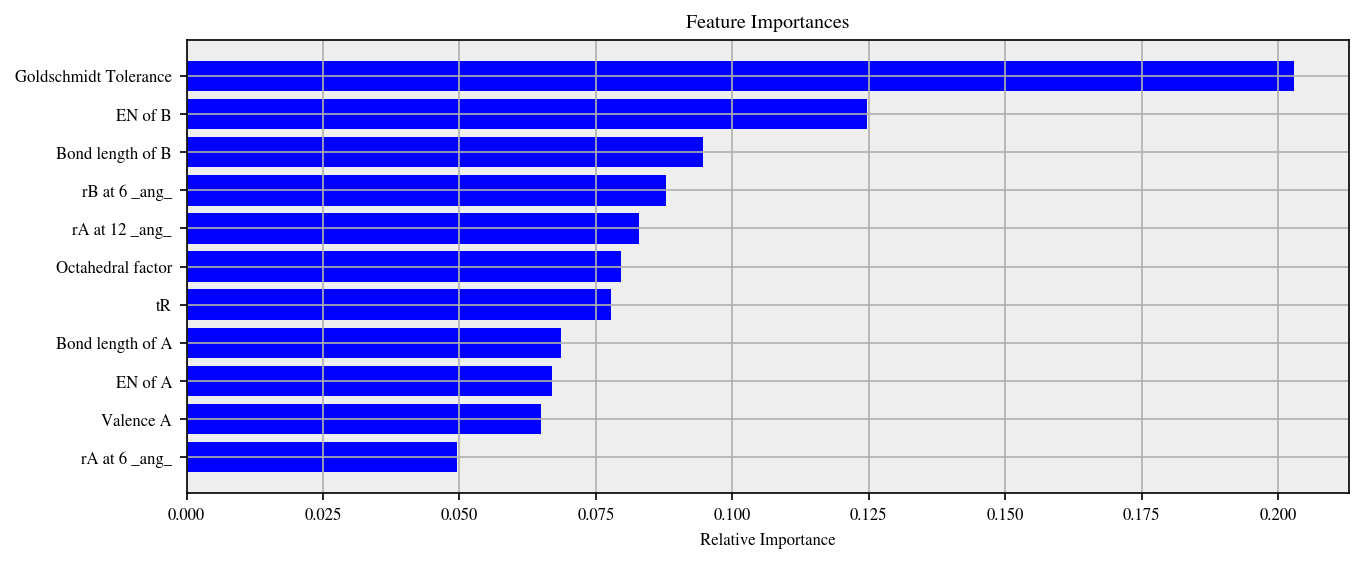

In [291]:
features = X_new.columns
importances = model4.feature_importances_
indices = np.argsort(importances)

#plt.figure(figsize=(6,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [292]:
#with both valence a and b
#0.7113543091655267
#array([[381,  71,  10,   4],
#       [ 64, 113,   9,   3],
#       [ 13,  21,  22,   2],
#       [  5,   8,   1,   4]], dtype=int64)

#without valence B
#unchanged.

#Using VA/VB
#0.7099863201094391

#Only real values with tR acc=0.8
#acc=0.8

#Involving EN and BL values
#acc=0.8142857142857143


